In [1]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from matplotlib import pyplot as plot

prices = [100, 100, 120, 112, 100, 105, 98, 102, 110, 108, 107, 111, 109, 112, 115, 113]

Początkowy poziom: 100.00
Początkowy trend: 0.00

Krok 1: trend = 0.00
Krok 1: X_t=100
  Poziom: 0.3 * 100 + 0.7 * (100.00 + 0.00) = 100.00
  Trend: 0.1 * (100.00 - 100.00) + 0.9 * 0.00 = 0.00
  Wygładzona: 100.00 + 0.00 = 100.00

Krok 2: trend = 0.60
Krok 2: X_t=120
  Poziom: 0.3 * 120 + 0.7 * (100.00 + 0.00) = 106.00
  Trend: 0.1 * (106.00 - 100.00) + 0.9 * 0.00 = 0.60
  Wygładzona: 106.00 + 0.60 = 106.60

Krok 3: trend = 0.76
Krok 3: X_t=112
  Poziom: 0.3 * 112 + 0.7 * (106.00 + 0.60) = 108.22
  Trend: 0.1 * (108.22 - 106.00) + 0.9 * 0.60 = 0.76
  Wygładzona: 108.22 + 0.76 = 108.98

Krok 4: trend = 0.49
Krok 4: X_t=100
  Poziom: 0.3 * 100 + 0.7 * (108.22 + 0.76) = 106.29
  Trend: 0.1 * (106.29 - 108.22) + 0.9 * 0.76 = 0.49
  Wygładzona: 106.29 + 0.49 = 106.78

Krok 5: trend = 0.44
Krok 5: X_t=105
  Poziom: 0.3 * 105 + 0.7 * (106.29 + 0.49) = 106.25
  Trend: 0.1 * (106.25 - 106.29) + 0.9 * 0.49 = 0.44
  Wygładzona: 106.25 + 0.44 = 106.69

Krok 6: trend = 0.18
Krok 6: X_t=98
  Poziom:

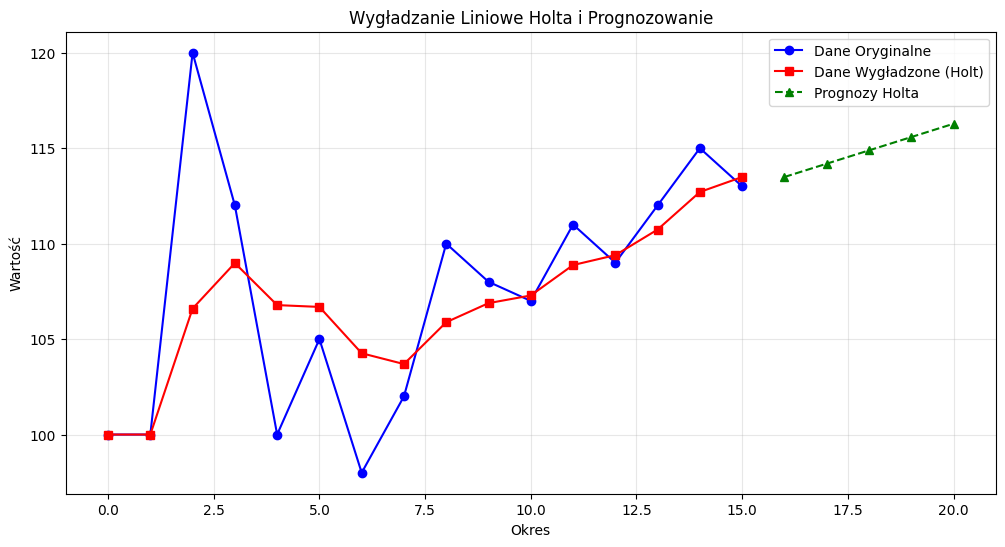

In [2]:

def holt_linear_trend(data, alpha=0.3, beta=0.1):
    """
    Metoda Holta (Podwójne Wygładzanie Wykładnicze) w czystym Pythonie
    
    data: lista liczb
    alpha: parametr wygładzania poziomu (0 < alpha <= 1)
    beta: parametr wygładzania trendu (0 < beta <= 1)
    """
    if len(data) < 2:
        return data
    
    # Inicjalizacja poziomu i trendu
    level = [data[0]]
    trend = [data[1] - data[0]]  # Początkowy trend
    smoothed = [data[0]]
    
    print(f"Początkowy poziom: {level[0]:.2f}")
    print(f"Początkowy trend: {trend[0]:.2f}")
    print()
    
    # Zastosowanie metody Holta
    for i in range(1, len(data)):
        # Aktualizacja poziomu: L_t = α * X_t + (1-α) * (L_{t-1} + T_{t-1})
        new_level = alpha * data[i] + (1 - alpha) * (level[i-1] + trend[i-1])

        # Aktualna wartość poziomu to 30% (przy alpha=0.3) wartości bieżącej 
        # i 70% sumy poprzedniego poziomu i trendu

        level_change = new_level - level[i-1]
        
        # Aktualizacja trendu: T_t = β * (L_t - L_{t-1}) + (1-β) * T_{t-1}
        new_trend = beta * level_change + (1 - beta) * trend[i-1]

        print(f"Krok {i}: trend = {new_trend:.2f}")
        
        # Wartość wygładzona: S_t = L_t + T_t
        new_smoothed = new_level + new_trend
        
        print(f"Krok {i}: X_t={data[i]}")
        print(f"  Poziom: {alpha} * {data[i]} + {1-alpha} * ({level[i-1]:.2f} + {trend[i-1]:.2f}) = {new_level:.2f}")
        print(f"  Trend: {beta} * ({new_level:.2f} - {level[i-1]:.2f}) + {1-beta} * {trend[i-1]:.2f} = {new_trend:.2f}")
        print(f"  Wygładzona: {new_level:.2f} + {new_trend:.2f} = {new_smoothed:.2f}")
        print()
        
        level.append(new_level)
        trend.append(new_trend)
        smoothed.append(new_smoothed)
    
    return smoothed, level, trend

def holt_forecast(level, trend, periods=1):
    """
    Prognozowanie przyszłych wartości metodą Holta
    F_{t+h} = L_t + h * T_t
    """
    ostatni_poziom = level[-1]
    ostatni_trend = trend[-1]
    
    prognozy = []
    for h in range(1, periods + 1):
        prognoza = ostatni_poziom + h * ostatni_trend
        prognozy.append(prognoza)
    
    return prognozy

# Przykład z twoimi cenami
prices = [100, 100, 120, 112, 100, 105, 98, 102, 110, 108, 107, 111, 109, 112, 115, 113]
alpha = 0.3  # Wygładzanie poziomu
beta = 0.1   # Wygładzanie trendu

# Zastosowanie metody Holta
smoothed, levels, trends = holt_linear_trend(prices, alpha, beta)

# Prognoza na następne 5 okresów
forecasts = holt_forecast(levels, trends, periods=5)

print("="*60)
print("WYNIKI:")
print("="*60)
print("Dane oryginalne:", prices)
print("Dane wygładzone:", [round(x, 2) for x in smoothed])
print("Końcowy poziom:", round(levels[-1], 2))
print("Końcowy trend:", round(trends[-1], 2))
print("Prognozy na 5 okresów:", [round(x, 2) for x in forecasts])

# Wykres
figure = plot.figure(figsize=(12, 6))
plot.plot(prices, label='Dane Oryginalne', marker='o', color='blue')
plot.plot(smoothed, label='Dane Wygładzone (Holt)', marker='s', color='red')
plot.plot(range(len(prices), len(prices) + len(forecasts)), forecasts, 
          label='Prognozy Holta', marker='^', linestyle='--', color='green')
plot.title("Wygładzanie Liniowe Holta i Prognozowanie")
plot.xlabel("Okres")
plot.ylabel("Wartość")
plot.legend()            
plot.grid(True, alpha=0.3)
plot.show()


In [ ]:

def wyjasnij_trend():
    """Szczegółowe wyjaśnienie obliczania trendu"""
    
    # Przykładowe dane
    data = [100, 100, 120, 112]
    alpha = 0.3
    beta = 0.1
    
    # Inicjalizacja
    level = [100]  # L_0 = 100
    trend = [0]    # T_0 = 100 - 100 = 0 (różnica pierwszych dwóch wartości)
    
    print("=== OBLICZANIE TRENDU KROK PO KROKU ===")
    print(f"Beta (β) = {beta} - parametr wygładzania trendu")
    print(f"Wzór: T_t = β * (L_t - L_{{t-1}}) + (1-β) * T_{{t-1}}")
    print()
    
    for i in range(1, len(data)):
        # Najpierw oblicz poziom
        new_level = alpha * data[i] + (1 - alpha) * (level[i-1] + trend[i-1])
        
        # Potem oblicz trend
        zmiana_poziomu = new_level - level[i-1]
        nowy_trend = beta * zmiana_poziomu + (1 - beta) * trend[i-1]
        
        print(f"KROK {i}: X_t = {data[i]}")
        print(f"  Poziom: L_{i} = {new_level:.2f}")
        print(f"  Zmiana poziomu: L_{i} - L_{i-1} = {new_level:.2f} - {level[i-1]:.2f} = {zmiana_poziomu:.2f}")
        print(f"  Trend: T_{i} = {beta} * {zmiana_poziomu:.2f} + {1-beta} * {trend[i-1]:.2f}")
        print(f"       = {beta * zmiana_poziomu:.3f} + {(1-beta) * trend[i-1]:.3f} = {nowy_trend:.3f}")
        
        if nowy_trend > 0:
            print(f"  → Trend dodatni: wartości rosną o {nowy_trend:.3f} na okres")
        elif nowy_trend < 0:
            print(f"  → Trend ujemny: wartości maleją o {abs(nowy_trend):.3f} na okres")
        else:
            print(f"  → Brak trendu: wartości są stabilne")
        print()
        
        level.append(new_level)
        trend.append(nowy_trend)

wyjasnij_trend()